Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 213ms/step - accuracy: 0.5820 - loss: 0.7165 - val_accuracy: 0.9066 - val_loss: 0.2578 - learning_rate: 0.0010
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - accuracy: 0.8058 - loss: 0.4215 - val_accuracy: 0.9344 - val_loss: 0.1585 - learning_rate: 0.0010
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 166ms/step - accuracy: 0.8831 - loss: 0.2950 - val_accuracy: 0.9377 - val_loss: 0.1516 - learning_rate: 0.0010
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - accuracy: 0.9034 - loss: 0.2435 - val_accuracy: 0.9867 - val_loss: 0.0517 - learning_rate: 0.0010
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - accuracy: 0.9561 - loss: 0.1254 - val_accuracy: 0.9933 - val_loss: 0.0284 - learning_rate: 0.0010
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - accuracy: 0.9532 - loss: 0.1223 - val_accuracy: 0.9922 - val_loss: 0.0202 - learning_rate: 0.0010
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - accuracy: 0.9489 - loss: 0.1360 - val_ac

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0072
Test accuracy: 1.0


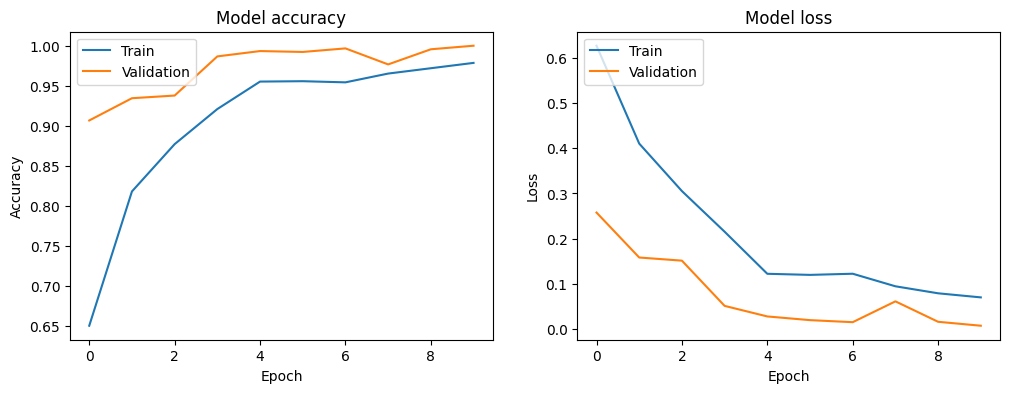

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


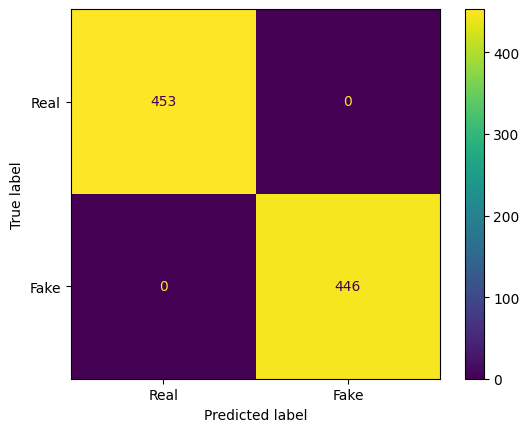

Classification Report:
               precision    recall  f1-score   support

        Real       1.00      1.00      1.00       453
        Fake       1.00      1.00      1.00       446

    accuracy                           1.00       899
   macro avg       1.00      1.00      1.00       899
weighted avg       1.00      1.00      1.00       899



In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import random
import graphviz
# Load a subset of images from your datasets including subfolders
def load_images_from_folder(folder):
    images = []
    for root, _, files in os.walk(folder):
        files = [file for file in files if file.endswith(('.png', '.jpg', '.jpeg'))]  # Filter out non-image files
        sampled_files = random.sample(files, min(len(files), 100))  # Sample a maximum of 100 files
        for file in sampled_files:
            img = cv2.imread(os.path.join(root, file))
            if img is not None:
                images.append(img)
    return images


# Define the folders and load the images
real_folder = r'/content/drive/MyDrive/raw/ClientRaw'
fake_folder = r'/content/drive/MyDrive/raw/ImposterRaw'
real_images = load_images_from_folder(real_folder)
fake_images = load_images_from_folder(fake_folder)

# Preprocessing images
def preprocess_images(images, size=(128, 128)):
    processed_images = []
    for img in images:
        img_resized = cv2.resize(img, size)
        img_normalized = img_resized / 255.0
        processed_images.append(img_normalized)
    return np.array(processed_images)

real_images_processed = preprocess_images(real_images)
fake_images_processed = preprocess_images(fake_images)

# Create Labels: Assign labels to your images (1 for real, 0 for fake)
real_labels = np.ones(len(real_images_processed))
fake_labels = np.zeros(len(fake_images_processed))

X = np.concatenate((real_images_processed, fake_images_processed), axis=0)
y = np.concatenate((real_labels, fake_labels), axis=0)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Build the Model: Use a Convolutional Neural Network (CNN) for image classification
model = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Callbacks for Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the Model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)
# Save the Model
#keras.saving.save_model(model)
model.save(r'/content/drive/MyDrive/raw/NuAA_model1.h5')
# Evaluate on Test Data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

# Visualize Results: Plot accuracy and loss curves for better understanding
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Confusion Matrix
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])
disp.plot()
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_labels, target_names=['Real', 'Fake']))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')